## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_merge_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how="outer")

# Display the data table for preview
mouse_merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice = len(mouse_merge_df['Mouse ID'].unique())
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_df = mouse_merge_df[mouse_merge_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_mouse_df = mouse_merge_df[mouse_merge_df.duplicated(subset=['Mouse ID','Timepoint'], keep='first')]
clean_mouse_df = mouse_merge_df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep='first')
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(clean_mouse_df['Mouse ID'].unique())
mice_count

249

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_volume_mean_reg = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_volume_median_reg = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_variance_reg = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_std_reg = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_sem_reg = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats_reg_df = pd.DataFrame({'Tumor Volume Mean':tumor_volume_mean_reg, 
                                 'Tumor Volume Median':tumor_volume_median_reg,
                                 'Tumor Volume Variance':tumor_volume_variance_reg,
                                 'Tumor Volume Standard Dev':tumor_volume_std_reg,
                                 'Tumor Volume SEM':tumor_volume_sem_reg})
summary_stats_reg_df

# Using the aggregation method, produce the same summary statistics in a single line
df = clean_mouse_df["Tumor Volume (mm3)"]
agg = df.agg(['mean', 'median','std','var','sem'])
agg_df = pd.DataFrame(agg)
agg_df

,Tumor Volume (mm3)
mean,50.449276
median,48.951421
std,8.904565
var,79.291277
sem,0.204933


## Bar and Pie Charts

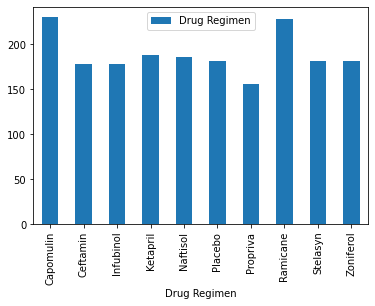

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_measurements = clean_mouse_df.groupby("Drug Regimen")["Drug Regimen"].count()
drug_measurements_df = pd.DataFrame(drug_measurements)
drug_measurements_df.plot.bar()

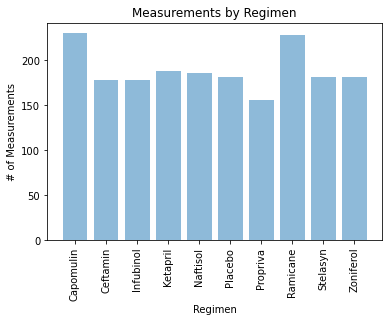

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = ['Capomulin', 'Ceftamin', 'Infubinol','Ketapril', 'Naftisol', 'Placebo', 'Propriva','Ramicane','Stelasyn','Zoniferol']
y_axis = [230,178,178,188,186,181,156,228,181,182]
plt.bar(x_axis, y_axis, align='center', alpha=0.5)
plt.ylabel('# of Measurements')
plt.xlabel('Regimen')
plt.title('Measurements by Regimen')
plt.xticks(rotation='vertical')
plt.show()

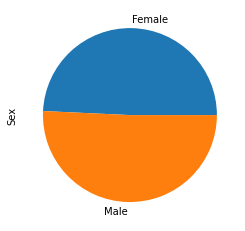

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = clean_mouse_df.groupby("Sex")["Sex"].count()
gender_count.plot.pie()

([<matplotlib.patches.Wedge at 0x1f6d8b0d820>,
 [Text(-0.025622895044835736, 1.0997015355311284, 'Male'),
  Text(0.025622792083347525, -1.099701537930112, 'Female')])

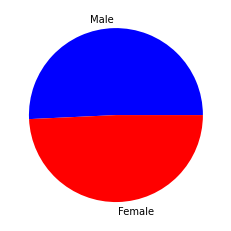

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
size = [958,930]
colors = ['b','r']

plt.pie(size, labels=labels, colors=colors)

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
max_tp_group = clean_mouse_df.loc[clean_mouse_df['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
max_tp_group = max_tp_group.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(max_tp_group, clean_mouse_df, on='Mouse ID')
clean_max_timepoint_merge = merge_df.loc[merge_df['Timepoint_x'] == merge_df['Timepoint_y']].reset_index()
dropy_clean_max_timepoint_merge = clean_max_timepoint_merge.drop(columns=['Timepoint_y'])
dropy_clean_max_timepoint_merge

,index,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,9,a203,45,Infubinol,Female,20,23,67.973419,2
1,19,a251,45,Infubinol,Female,21,25,65.525743,1
2,29,a275,45,Ceftamin,Female,20,28,62.999356,3
3,39,a411,45,Ramicane,Male,3,22,38.407618,1
4,49,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...,...
95,773,y769,45,Ceftamin,Female,6,27,68.594745,4
96,783,y793,45,Capomulin,Male,17,17,31.896238,2
97,793,y865,45,Ceftamin,Male,23,26,64.729837,3
98,803,z578,45,Ramicane,Male,11,16,30.638696,0


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data=[]

for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = dropy_clean_max_timepoint_merge.loc[dropy_clean_max_timepoint_merge["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_data.append(tumor_volume)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print("\n==========================")
    print(drug)
    print("==========================\n")
    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")
    print(f"The the median of tumor volume is: {quartiles[0.5]} ")
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")


Capomulin

The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane

The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Infubinol

The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The the median of tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

Ceftamin

The lower quartile of 

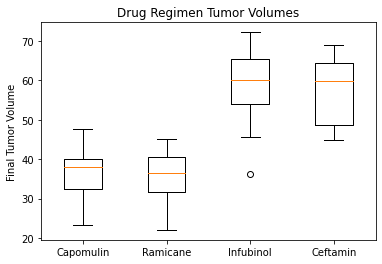

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen Tumor Volumes')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(tumor_volume_data, labels=drugs)
plt.show()

## Line and Scatter Plots

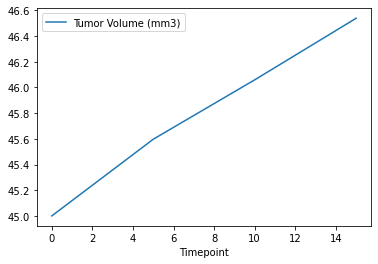

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin"]
capomulin_mouse_df = capomulin_df.loc[capomulin_df['Mouse ID']=="r157"]

line_plot = capomulin_mouse_df.plot.line(x='Timepoint', y='Tumor Volume (mm3)')

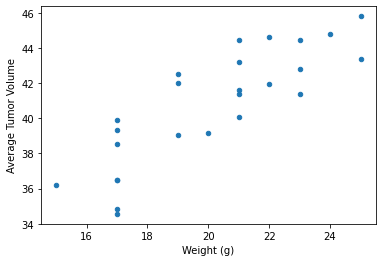

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg = capomulin_df.groupby(["Mouse ID","Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()
avg_df = pd.DataFrame(avg)
avg_df = avg_df.rename(columns={'Tumor Volume (mm3)':'Average Tumor Volume'})

avg_df.plot(kind="scatter",x="Weight (g)", y="Average Tumor Volume")

## Correlation and Regression

The correlation between both factors is 0.84


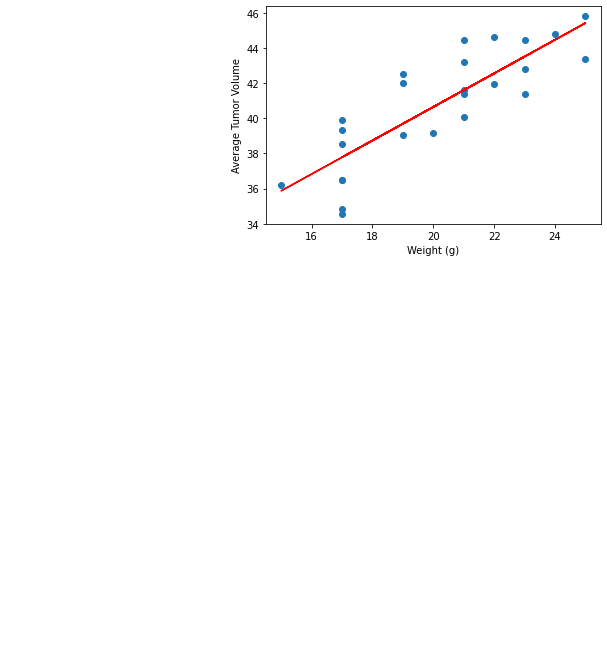

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

avg = capomulin_df.groupby(["Mouse ID","Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()
avg_df = pd.DataFrame(avg)
avg_df = avg_df.rename(columns={'Tumor Volume (mm3)':'Average Tumor Volume'})

weight = avg_df["Weight (g)"]
avg_volume = avg_df["Average Tumor Volume"]
correlation = st.pearsonr(weight,avg_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values = avg_df['Weight (g)']
y_values = avg_df['Average Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.show()